## Name: Chinedu Onyeka
## Course: DATA1203-Business Analysis and Assessments: Assessment 1

### Pareto chart for total covid vaccines administered in Canada by province.
#### Data Source: https://health-infobase.canada.ca/covid-19/vaccine-administration/; "This report was last updated on October 4, 2021 with data up to and including September 25, 2021"


In [92]:
# Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
%matplotlib inline

In [93]:
# Load the data from github repo:

url = "https://raw.githubusercontent.com/chinedu2301/DC_Analytics/main/vaccination-administration.csv"
vax_df = pd.read_csv(url)
vax_df.head(n = 10)

,pruid,prename,report_date,numtotal_all_administered,as_of_date,updated,numdelta_all_administered,numavglast7_all_administered
0,1,Canada,1/12/2021,267078,1/12/2021,1,NaN,NaN
1,35,Ontario,1/12/2021,122105,1/11/2021,1,NaN,NaN
2,59,British Columbia,1/12/2021,59902,1/12/2021,1,NaN,NaN
3,48,Alberta,1/12/2021,46791,1/11/2021,1,NaN,NaN
4,47,Saskatchewan,1/12/2021,8948,1/12/2021,1,NaN,NaN
5,12,Nova Scotia,1/12/2021,2720,1/5/2021,1,NaN,NaN
6,46,Manitoba,1/12/2021,10353,1/11/2021,1,NaN,NaN
7,13,New Brunswick,1/12/2021,7732,1/11/2021,1,NaN,NaN
8,10,Newfoundland and Labrador,1/12/2021,3760,1/6/2021,1,NaN,NaN
9,11,Prince Edward Island,1/12/2021,4226,1/11/2021,1,NaN,NaN


Clean the data to get only the columns needed for analysis

In [94]:
# Subset the dataframe to include only columns: prename, numtotal_all_administered
vax_sub_df = vax_df[["prename", "numtotal_all_administered"]]
# Rename the prename column to province
vax_sub_df = vax_sub_df.rename(columns = {"prename" : "province"})

# Group by province
vax = vax_sub_df.groupby('province').sum()

#Sort the values in descending order
vax = vax.sort_values(by = "numtotal_all_administered", ascending=False)
vax

,numtotal_all_administered
province,
Canada,6841766494
Ontario,2671254674
Quebec,1561567077
British Columbia,940601733
Alberta,751240401
Manitoba,245796963
Saskatchewan,200418172
Nova Scotia,176696753
New Brunswick,140853157


In [95]:
# We do not need the Canada row in this dataset since Canada is not a province but simply the total for all provinces.
# Drop the Canada row
vax = vax.drop("Canada")

# Add cummulative percentage column
vax["cum_percentage"] = round(vax["numtotal_all_administered"].cumsum()/vax["numtotal_all_administered"].sum()*100, 2)
vax

,numtotal_all_administered,cum_percentage
province,,
Ontario,2671254674,39.04
Quebec,1561567077,61.87
British Columbia,940601733,75.62
Alberta,751240401,86.60
Manitoba,245796963,90.19
Saskatchewan,200418172,93.12
Nova Scotia,176696753,95.70
New Brunswick,140853157,97.76
Newfoundland and Labrador,93703015,99.13


Create Pareto Chart

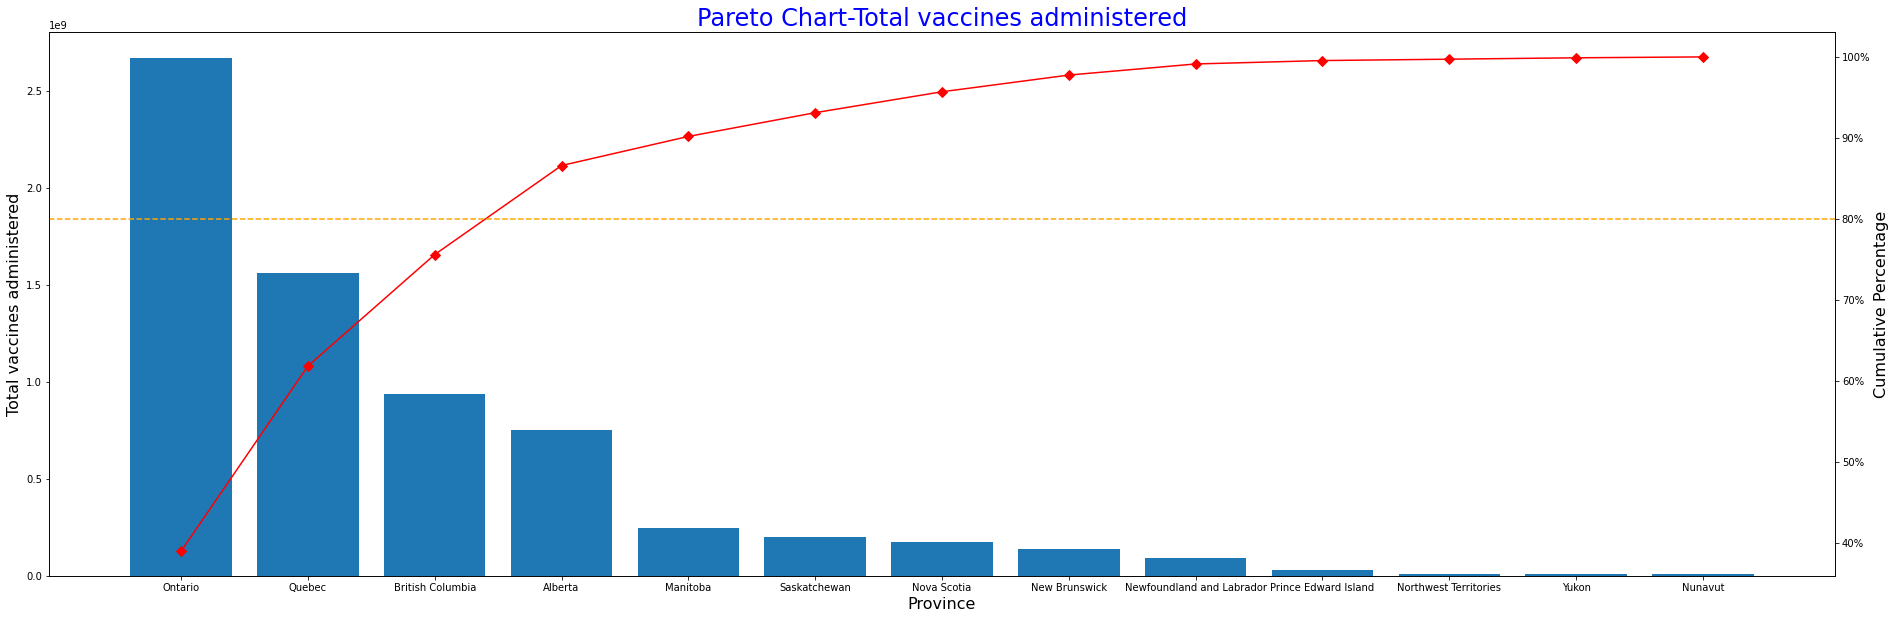

In [96]:
# Set figure and axis
fig, ax = plt.subplots(figsize=(32,10))

# Plot bars (i.e. Total vaccines administered by province)
ax.bar(vax.index, vax["numtotal_all_administered"])
ax.set_title("Pareto Chart-Total vaccines administered", fontsize=24, color="b")
ax.set_xlabel("Province", fontsize=16, color="black")
ax.set_ylabel("Total vaccines administered", fontsize=16, color="black");

# Second y axis (i.e. cumulative percentage)
ax2 = ax.twinx()
ax2.plot(vax.index, vax["cum_percentage"], color="red", marker="D", ms=7)
ax2.axhline(80, color="orange", linestyle="dashed")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel("Cumulative Percentage", fontsize=16);

From the pareto chart, it can be seen that 80% percent of total vaccine doses administered in Canada as of September 25th, 2021 was administered in Ontario, Quebec, and British Columbia. This can be explained by the fact that those are the top three(3) most populous provinces in Canada

In [97]:
# Reset the index
vax_can = vax.reset_index()
vax_can

,province,numtotal_all_administered,cum_percentage
0,Ontario,2671254674,39.04
1,Quebec,1561567077,61.87
2,British Columbia,940601733,75.62
3,Alberta,751240401,86.60
4,Manitoba,245796963,90.19
5,Saskatchewan,200418172,93.12
6,Nova Scotia,176696753,95.70
7,New Brunswick,140853157,97.76
8,Newfoundland and Labrador,93703015,99.13
9,Prince Edward Island,28876981,99.55


In [98]:
# Add a percentage column
vax_can = vax_can[["province", "numtotal_all_administered"]]
vax_can["Percentage"] = (vax_can["numtotal_all_administered"]/vax_can["numtotal_all_administered"].sum())*100
vax_can

,province,numtotal_all_administered,Percentage
0,Ontario,2671254674,39.043348
1,Quebec,1561567077,22.824034
2,British Columbia,940601733,13.747937
3,Alberta,751240401,10.980211
4,Manitoba,245796963,3.592595
5,Saskatchewan,200418172,2.929334
6,Nova Scotia,176696753,2.582619
7,New Brunswick,140853157,2.058725
8,Newfoundland and Labrador,93703015,1.369573
9,Prince Edward Island,28876981,0.422069


Create Bar plot

Text(0, 0.5, 'Total vaccines administered')

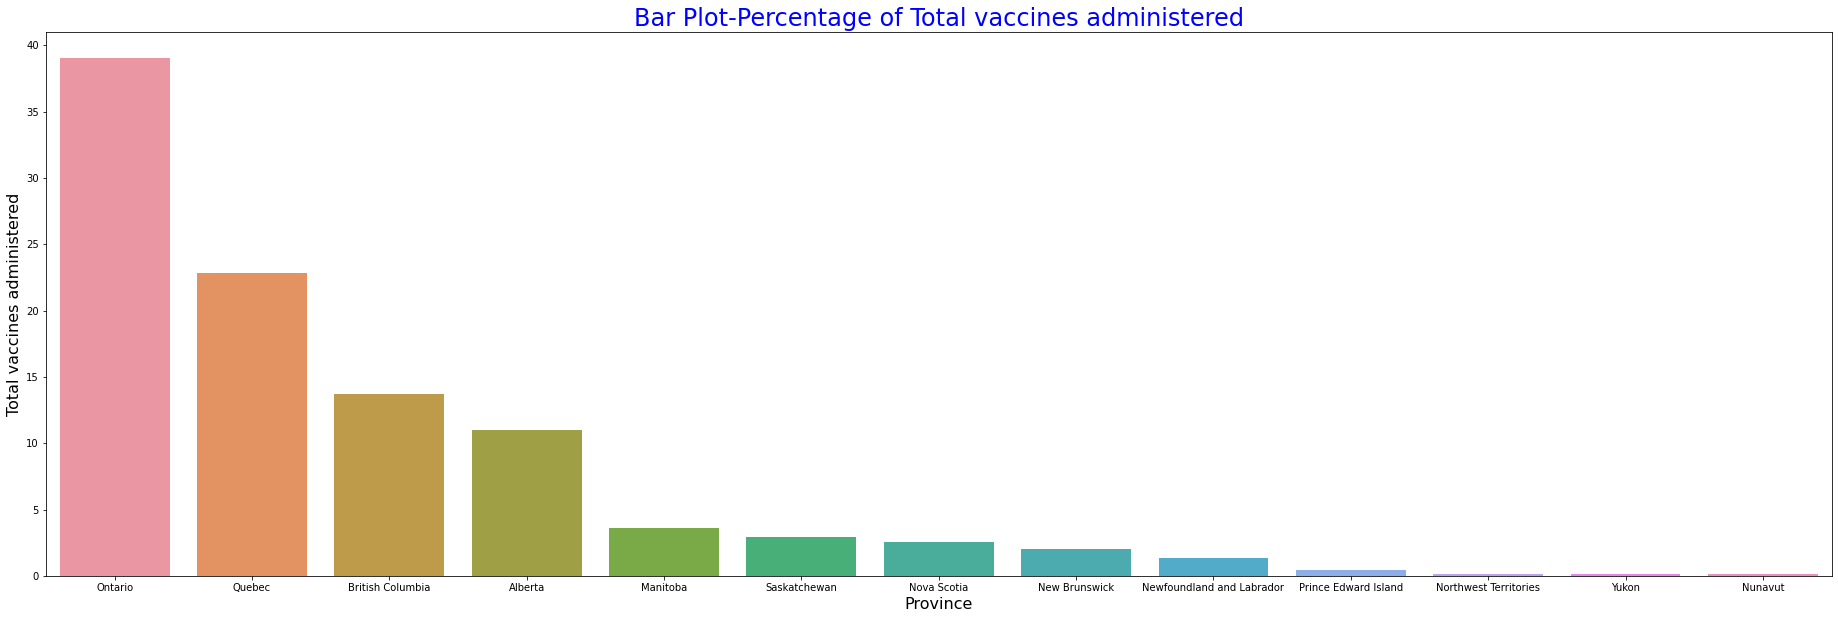

In [99]:
fig, ax = plt.subplots(figsize=(32,10))
sns.barplot(x = "province", y = "Percentage", data=vax_can)
ax.set_title("Bar Plot-Percentage of Total vaccines administered", fontsize=24, color="b")
ax.set_xlabel("Province", fontsize=16, color="black")
ax.set_ylabel("Total vaccines administered", fontsize=16, color="black")

Create Scatter plot

Text(0, 0.5, 'Total vaccines administered')

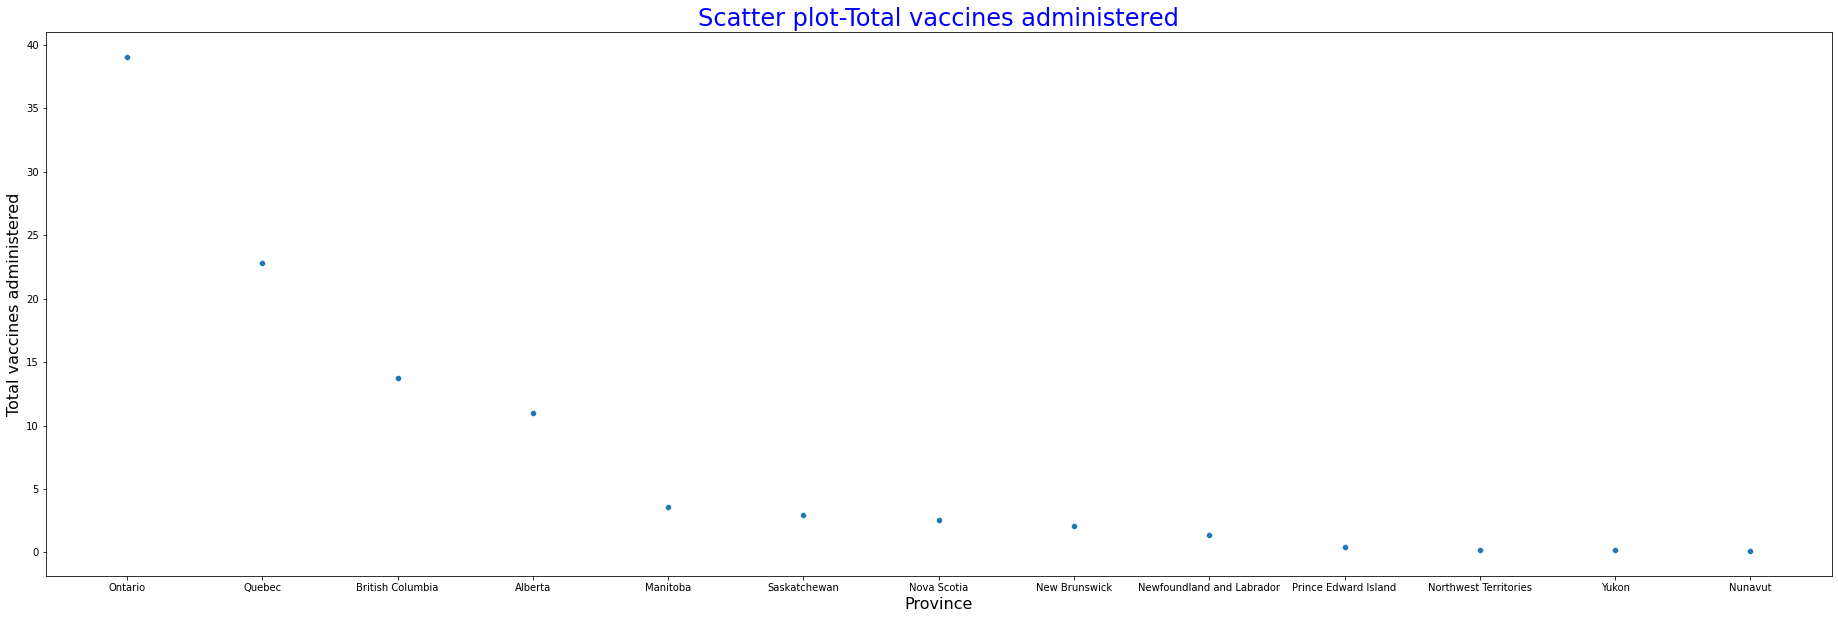

In [100]:
# scatter plot
fig, ax = plt.subplots(figsize=(32,10))
sns.scatterplot(x = "province", y = "Percentage", data=vax_can)
ax.set_title("Scatter plot-Total vaccines administered", fontsize=24, color="b")
ax.set_xlabel("Province", fontsize=16, color="black")
ax.set_ylabel("Total vaccines administered", fontsize=16, color="black")

ax2 = ax.twinx()
ax2.plot("province", vax_can["Percentage"], color="red", marker="D", ms=7)